# Final Project: 
### Kelcey Davis and Rachel Lee

## Table of Contents (clickable)

### 1. [Imports](#funcdef)

### 2.  [Loading Data](#load)

### 3. [Cutting the Data](#cuts)

### 4. [Generating SED plots](#sed)

### 5. [Identifyind SED Templates](#temp)

### 6. [Building the Redshift Grid](#grid)

### 7. [The Chi Squared Fit](#chi)

### 8. [Generating Fits for our Sample Sources](#sources)

<a class="anchor" id="funcdef"></a>

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
from astropy.io import fits
#Code written before the start of this project is stored in final_project.py
from final_project import *

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

<a class="anchor" id="load"></a>
# Loading the data we need


### All the data:

In [3]:
data = pd.read_pickle('big_data')
data

RA        DEC  Region  Stellarity           F115           F150  \
0     215.024752  52.981212       1       0.821  139492.014814  136481.557209   
1     214.983212  52.952023       2       0.029   12304.995776   21132.884036   
2     214.984985  52.951200       2       0.364   18156.358950   27788.207956   
3     215.034005  52.986189       1       0.029   37419.138223   52888.557422   
4     215.052963  52.997723       1       0.239   41989.647261   55761.184436   
...          ...        ...     ...         ...            ...            ...   
9201  214.828826  52.798678       2       0.018     149.176427     137.486779   
9202  214.912746  52.844553       1       0.630      28.854944      30.528963   
9203  214.904154  52.839601       1       0.482       0.005228       0.009379   
9204  214.919315  52.849213       1       0.582       3.367262       7.235462   
9205  214.890072  52.843093       1       0.488       1.319952       1.559859   

               F200          F277           F356          F410  ...  \
0     114663.659470  50708.259260  128218.504232  89432.307145  ...   
1      33883.504105  50716.320411   57724.468502  54145.566928  ...   
2      40432.589604  55513.348304   60905.214135  55111.550498  ...   
3      68284.225064  56398.205674   40657.137985  44950.617224  ...   
4      57043.162150  75103.933965     344.535744   3510.311943  ...   
...             ...           ...            ...           ...  ...   
9201     150.358874    241.272051     179.430492    134.343543  ...   
9202      33.649958     15.605470      12.281535      3.918242  ...   
9203       0.000662      6.055759       8.566630      2.795595  ...   
9204       4.831313     31.423566      62.489169     99.214582  ...   
9205       1.703368      1.755430       2.386709      0.203430  ...   

        F140_ERROR  F160_ERROR  SPECTRAL_RED_SHIFT  STELLAR_MASS  \
0     5.243950e+01   33.285878              0.2500        10.319   
1     7.011145e+01   36.586082              1.0530        10.927   
2     7.434307e+01   32.467366              1.1200        11.045   
3     9.681434e+01   26.294318              0.2703         9.475   
4     4.056045e+14  252.310901              1.4200        10.233   
...            ...         ...                 ...           ...   
9201  2.533252e+01   12.743761              4.3100         8.293   
9202  1.486475e+01    6.138284              2.5100         7.177   
9203  1.333602e+01    6.558073              1.0600         6.172   
9204  4.897944e+01   21.401037              1.0300         8.026   
9205  3.424767e+00    2.240237              4.1800         7.624   

      STELLAR_MASS_ERR  PHOTOM_RED_SHIFT        Object          X          Y  \
0                0.299              0.25     nircam1-3  3033.1875   407.0526   
1                0.028              0.98     nircam1-2  7646.4517   419.7906   
2                0.026              1.12     nircam1-1  7638.5312   258.1606   
3                0.038              0.34     nircam1-4  2144.9175   286.0022   
4                0.857              1.42     nircam1-5   203.1697   142.7871   
...                ...               ...           ...        ...        ...   
9201             0.084              4.31  nircam6-8982  9581.9062  1246.8362   
9202             0.148              2.51  nircam6-9253  1446.7140   171.2970   
9203             0.013              1.06  nircam6-9247  2302.7722   260.9615   
9204             0.169              1.03  nircam6-9154   712.2482   170.8571   
9205             0.029              4.18  nircam6-7083  2644.4360  1310.1036   

            SFR  
0      3.827240  
1     48.278900  
2      2.216390  
3      4.595440  
4     73.807900  
...         ...  
9201   9.478430  
9202   0.726535  
9203   0.030849  
9204   5.131350  
9205   0.672200  

[36188 rows x 38 columns]

### A smaple of one pointing (2)

In [4]:
df2 = pd.read_pickle('df2')
df2

RA        DEC  Region  Stellarity          F115          F150  \
0     214.960976  52.932000       1       0.001    188.682528    302.025264   
1     214.850041  52.910182       2       0.684     -9.248760    -26.392688   
2     214.850641  52.910812       2       0.700      8.621534     16.670631   
3     214.850733  52.910972       2       0.015    266.958468    494.064654   
4     214.849914  52.910643       2       0.028  28049.476079  41588.845170   
...          ...        ...     ...         ...           ...           ...   
8749  214.950729  52.924874       1       0.019           NaN           NaN   
8750  214.950679  52.924834       1       0.019           NaN           NaN   
8751  214.959848  52.931333       1       0.001      3.853150      3.098311   
8752  214.950833  52.924951       1       0.019           NaN           NaN   
8753  214.927896  52.909088       1       0.431     -2.632151     -0.296988   

              F200          F277          F356          F410  ...  \
0       195.666162    155.926448    281.731762      0.059924  ...   
1       -34.805836    -57.390153    -34.328892    -18.832713  ...   
2        20.642629     40.275024     26.558330      8.663765  ...   
3       463.141290    603.369995    518.749640    438.881384  ...   
4     53508.568645  23560.603364  21245.940958  42407.217092  ...   
...            ...           ...           ...           ...  ...   
8749           NaN           NaN           NaN           NaN  ...   
8750           NaN           NaN           NaN           NaN  ...   
8751     -9.239871    129.954271     -3.646456      0.013774  ...   
8752           NaN           NaN           NaN           NaN  ...   
8753     -5.771812     -7.453958     -8.767842     -4.707943  ...   

        F140_ERROR    F160_ERROR  SPECTRAL_RED_SHIFT  STELLAR_MASS  \
0     6.479635e+01  2.714110e+01              4.1400         0.000   
1    -4.442541e+01 -2.595991e+01              6.0018         8.352   
2     2.762962e+01  1.987652e+01              1.5800         8.280   
3     5.368722e+01  3.406584e+01              1.5800         8.280   
4     4.899179e+02  3.660265e+02              0.1100         7.585   
...            ...           ...                 ...           ...   
8749  1.000000e+12  1.000000e+12              8.3101         9.973   
8750  1.000000e+12  1.000000e+12              8.3101         9.973   
8751  1.000000e+12  1.000000e+12             -1.0000         0.000   
8752  1.000000e+12  1.000000e+12             -1.0000         0.000   
8753 -9.187477e+00 -5.043501e+00              7.0820         8.182   

      STELLAR_MASS_ERR  PHOTOM_RED_SHIFT        Object          X          Y  \
0                0.000            4.1400     nircam2-1   520.2705  1733.1802   
1                0.140            6.0018    nircam2-31  7713.2373  6153.0210   
2                0.096            1.5800    nircam2-20  7627.5659  6168.7734   
3                0.096            1.5800    nircam2-20  7608.6050  6176.1919   
4                0.191            0.1100     nircam2-2  7677.0381  6195.7827   
...                ...               ...           ...        ...        ...   
8749             0.101            8.3101  nircam2-8762  1651.9840  1743.3491   
8750             0.101            8.3101  nircam2-8762  1657.9917  1743.0000   
8751             0.000           -1.0000  nircam2-8761   634.2019  1743.4180   
8752             0.000           -1.0000  nircam2-8763  1640.0358  1743.6152   
8753             0.191            7.0820  nircam2-8726  4165.3296  1774.1521   

            SFR  
0      7.980180  
1      6.879760  
2      1.689560  
3      1.689560  
4      0.316689  
...         ...  
8749  25.394400  
8750  25.394400  
8751   0.000000  
8752   0.000000  
8753   1.782330  

[8754 rows x 38 columns]

### The Cut Data

In [5]:
cut_data = pd.read_pickle('big_cut_data')
cut_data

RA        DEC  Region  Stellarity           F115  \
0      215.024752  52.981212       1       0.821  139492.014814   
1      214.983212  52.952023       2       0.029   12304.995776   
2      215.034005  52.986189       1       0.029   37419.138223   
3      214.940036  52.973504       2       0.915    3486.751272   
4      214.948737  52.979825       2       0.415     372.151522   
...           ...        ...     ...         ...            ...   
33137  214.917728  52.849546       1       0.693      15.992764   
33138  214.912216  52.845432       1       0.376       6.091118   
33139  214.905469  52.840647       1       0.432       3.431785   
33140  214.828826  52.798678       2       0.018     149.176427   
33141  214.890072  52.843093       1       0.488       1.319952   

                F150           F200          F277           F356  \
0      136481.557209  114663.659470  50708.259260  128218.504232   
1       21132.884036   33883.504105  50716.320411   57724.468502   
2       52888.557422   68284.225064  56398.205674   40657.137985   
3        5420.221424    7596.494780  11720.049401   13797.090490   
4         738.973788    1272.797392   2067.913355    2695.096097   
...              ...            ...           ...            ...   
33137      15.727966      15.195470     15.243228      15.018155   
33138       6.154537       4.123695      4.743662       6.412815   
33139       4.028424       3.851416      8.998598       9.090087   
33140     137.486779     150.358874    241.272051     179.430492   
33141       1.559859       1.703368      1.755430       2.386709   

               F410  ...  F140_ERROR    F160_ERROR  SPECTRAL_RED_SHIFT  \
0      89432.307145  ...   52.439496  3.328588e+01              0.2500   
1      54145.566928  ...   70.111446  3.658608e+01              1.0530   
2      44950.617224  ...   96.814335  2.629432e+01              0.2703   
3      13719.954188  ...   34.186826  2.560313e+01              1.1200   
4       3079.245105  ...   27.896768  3.566832e+13              2.8400   
...             ...  ...         ...           ...                 ...   
33137     13.586371  ...   12.592587  4.634549e+00              8.1501   
33138      0.775138  ...    8.052594  3.195565e+00              3.2600   
33139     12.688858  ...   15.654542  7.391690e+00              1.8432   
33140    134.343543  ...   25.332524  1.274376e+01              4.3100   
33141      0.203430  ...    3.424767  2.240237e+00              4.1800   

       STELLAR_MASS  STELLAR_MASS_ERR  PHOTOM_RED_SHIFT        Object  \
0            10.319             0.299            0.2500     nircam1-3   
1            10.927             0.028            0.9800     nircam1-2   
2             9.475             0.038            0.3400     nircam1-4   
3            10.253             0.025            1.1200    nircam1-63   
4             9.943             0.198            2.8400    nircam1-84   
...             ...               ...               ...           ...   
33137         8.487             1.245            8.1501  nircam6-9108   
33138         7.051             0.117            3.2600  nircam6-9176   
33139         7.287             0.043            1.8432  nircam6-9142   
33140         8.293             0.084            4.3100  nircam6-8982   
33141         7.624             0.029            4.1800  nircam6-7083   

               X          Y         SFR  
0      3033.1875   407.0526    3.827240  
1      7646.4517   419.7906   48.278900  
2      2144.9175   286.0022    4.595440  
3      7706.6348  4467.1123   34.590100  
4      6721.5366  4479.7754  176.771000  
...          ...        ...         ...  
33137   756.3657   284.3708    3.805030  
33138  1391.2582   268.9023    0.342881  
33139  2145.4531   269.6397    0.051668  
33140  9581.9062  1246.8362    9.478430  
33141  2644.4360  1310.1036    0.672200  

[28195 rows x 38 columns]

### The EELGs

In [6]:
eelgs = pd.read_pickle('eelgs')
eelgs

RA        DEC  Region  Stellarity       F115       F150  \
4    214.955712  52.983426       2       0.959  12.111284   6.617296   
11   214.940369  52.970817       2       0.143  35.397019  24.001542   
24   214.930437  52.960170       2       0.624  52.093099  43.950960   
28   214.951152  52.973409       2       0.778  27.697692  27.168353   
40   214.951936  52.971742       2       0.659  10.303382  38.746461   
..          ...        ...     ...         ...        ...        ...   
525  214.846157  52.809369       2       0.922  47.173621  42.404916   
529  214.847196  52.808349       2       0.969  41.865877  44.323613   
537  214.900216  52.844548       1       0.889  17.418578  17.311144   
544  214.860355  52.813352       2       0.855  20.764329  24.658043   
553  214.858181  52.809214       2       0.116  28.526852  30.600086   

          F200        F277       F356        F410  ...  SPECTRAL_RED_SHIFT  \
4    14.575215   19.126765  50.955854   19.845123  ...              7.2401   
11   30.455694   68.656104  53.023521   29.067086  ...              6.4801   
24   55.730953  121.401970  59.780602   30.684665  ...              4.3500   
28   27.720895   66.323156  42.228875   22.483288  ...              4.5500   
40   37.489974   54.789717  65.729269   64.936031  ...              9.1601   
..         ...         ...        ...         ...  ...                 ...   
525  38.862905   41.866656  46.295612  101.248204  ...              7.1201   
529  36.159395   40.938175  39.514535  121.506241  ...              7.0801   
537  13.874501   36.747642  15.034757   57.897959  ...              4.7300   
544  17.867454   19.673407  22.070584   49.415672  ...              7.3301   
553  42.454110   69.896043  36.165826   76.074306  ...              4.4700   

     STELLAR_MASS  STELLAR_MASS_ERR  PHOTOM_RED_SHIFT        Object  \
4           8.977             0.209            7.2401   nircam1-342   
11          8.347             0.143            6.4801   nircam1-641   
24          8.268             0.310            4.3500  nircam1-1233   
28          8.884             0.262            4.5500  nircam1-1478   
40          9.267             0.858            9.1601  nircam1-1850   
..            ...               ...               ...           ...   
525         8.328             0.074            7.1201  nircam6-7356   
529         8.663             0.128            7.0801  nircam6-7644   
537         8.015             0.204            4.7300  nircam6-7927   
544         8.135             0.979            7.3301  nircam6-8393   
553         8.664             0.159            4.4700  nircam6-8829   

             X          Y        SFR    Area      SHAPE  
4    6065.7910  4376.1494   3.136160     Top      p3p44  
11   7936.6235  4239.7817   4.404910     Top       w277  
24   9374.9424  3958.6521   4.183520     Top       w277  
28   7194.8125  3847.8994   1.600630     Top       w277  
40   7310.4062  3675.0889  12.458800     Top        p44  
..         ...        ...        ...     ...        ...  
525  7790.2964  1118.0483   5.525850  Bottom       w410  
529  7834.8018   981.3619   2.706410  Bottom       w410  
537  2035.3304   862.9374   0.608112  Bottom  p410sp277  
544  6759.5356   642.1173   2.794460  Bottom       w410  
553  7240.0898   441.0411   1.586390  Bottom   p277p410  

[182 rows x 40 columns]

<a class="anchor" id="cuts"></a>
# The cuts:

* the data was cut seperately in previous work before the start of this project. The following cuts were applied:

#### For our potential EELGs, we:

- color select: **1297** selected

- EW>5000: **638** selected

- throw out sources within 100 pixels of an edge

- throw out sources wihtin 1 arcsec of a source that is 100 nJy brighter than it: **555** sources

- select them to be brighter in 277 than 200 with a leniency of 10 nJy: **458** sources

- select those with at least 5 real observations not dimmer than 10nJy: **232** sources

- I also introduced a new cut for a photometric redshift >4. :after this final cut we have **203** possible EELGs.

- After finally throwing out by eye sources whose SEDs were clearly not EELGs (image artifacts, reddened galaxies) we have **182** remaining sources.

#### For our data:

- We applied all cuts above not meant to select for EELG candidates. We initially had **36,188** sources detected across 6 pointings. After these cuts we had **28,195** sources. The most extreme loss was in pointing 6 due to what seems to be an overdensity of sources. This could be why there seem to be less sources in this area or it could be a true spatial overdensity in the other pointings. Pointing 6 seems to be particularly over-dense with sources. This could indicate a more dynamic aproach to source selection is necessary. This could be something we think about later given enough time.

### The color selection:

* we may want to include this figure in the proposal. The sources are selected to be "extreme" in the color-color diagram of the three redest filters available to NIRCam. These color-selected sources are then selected to have equivalent widths > 5000 AA.

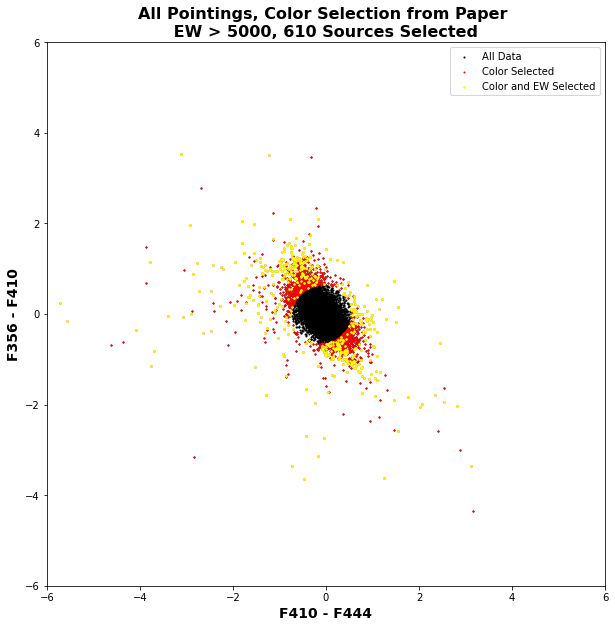

* The EELGs went through the spatial selection and these were the results:

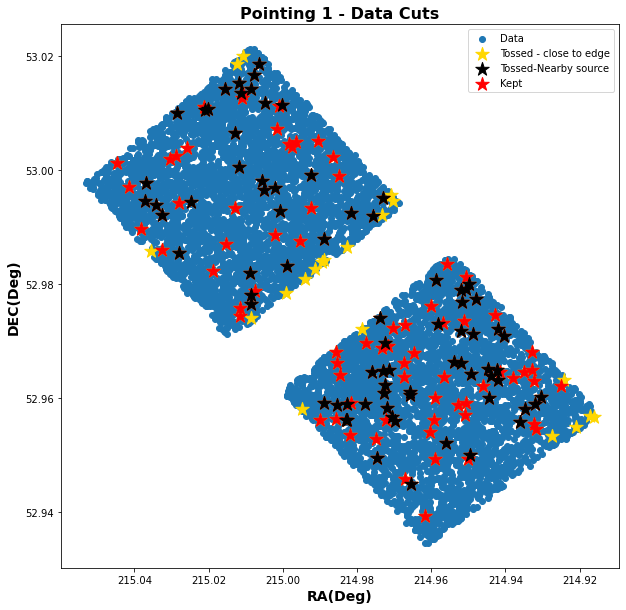

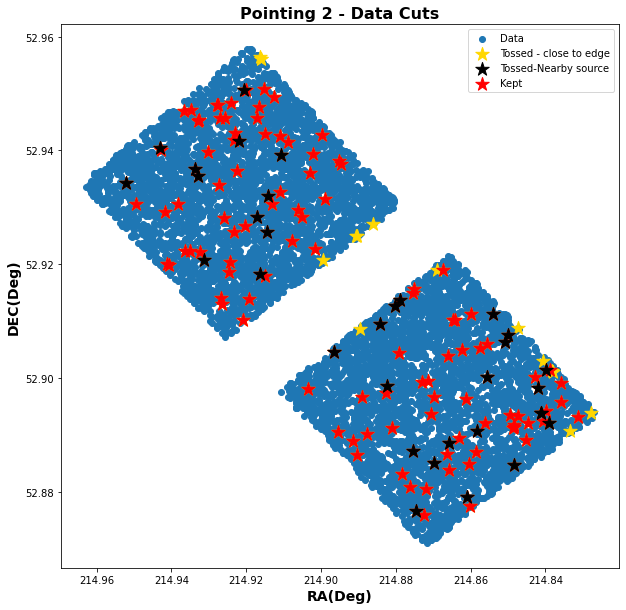

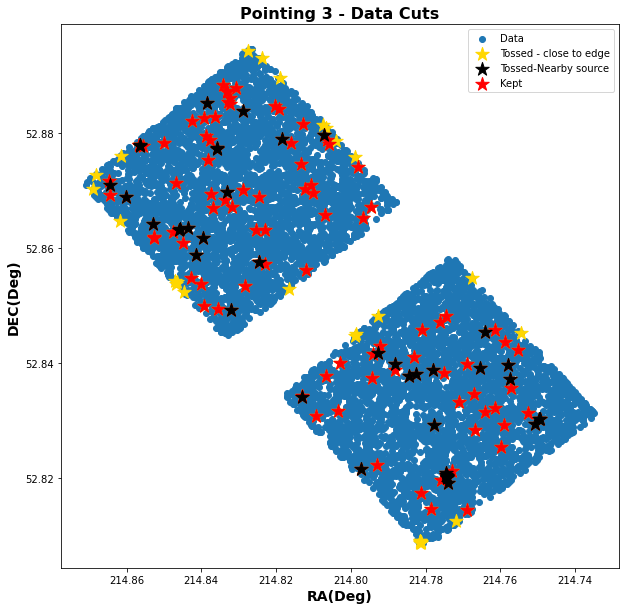

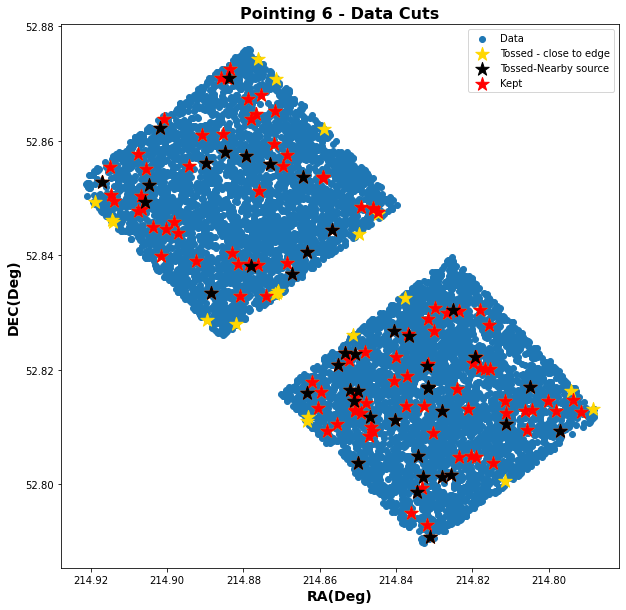

* these same plots for all data illustrate the over-density of sources in pointing 1.

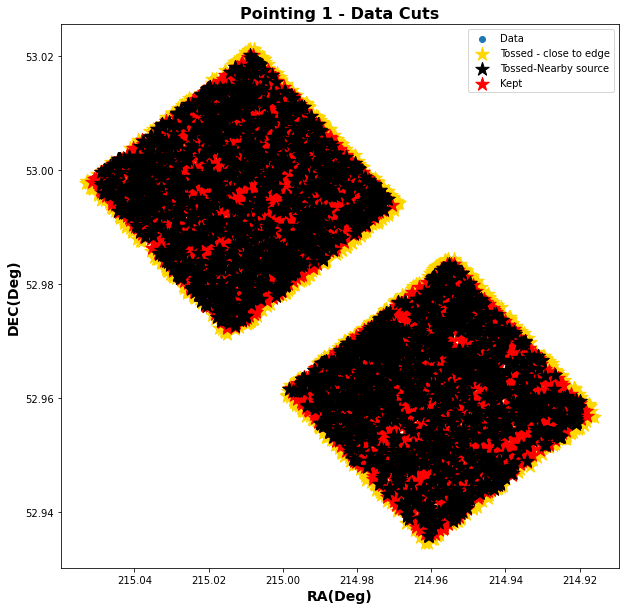

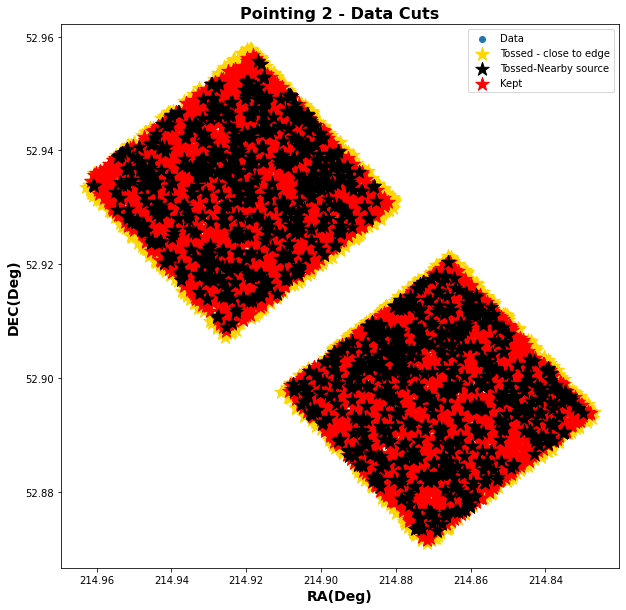

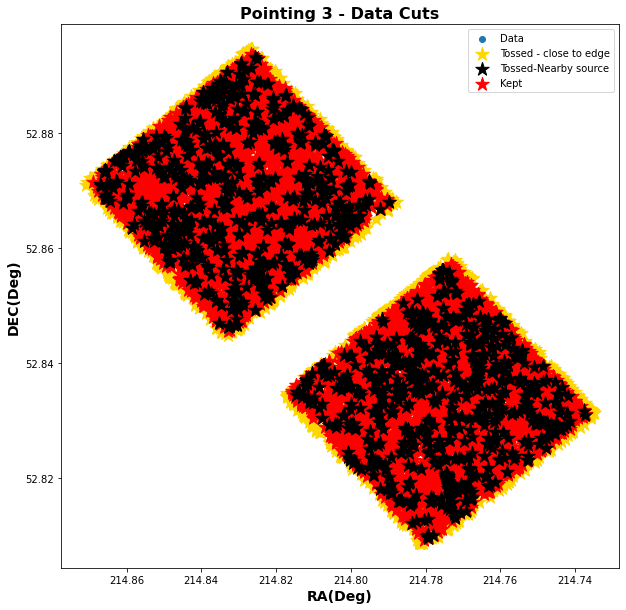

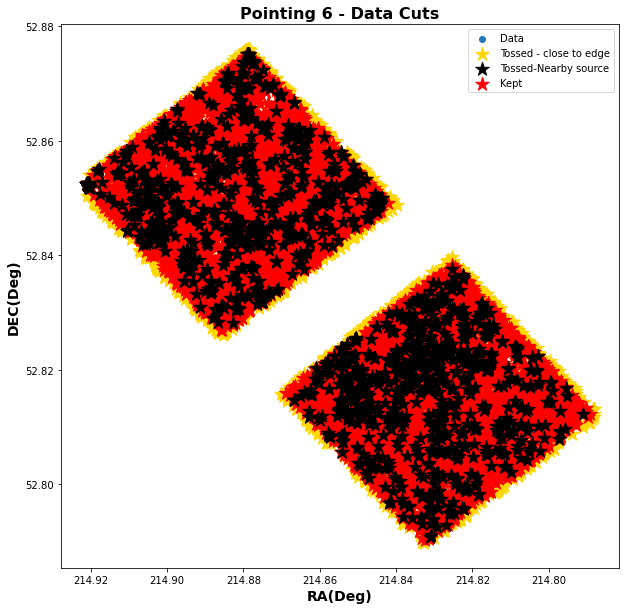

<a class="anchor" id="sed"></a>
# Generating the SEDs

 We can look at all the final selected SEDs on the same plot (although this is a mess):

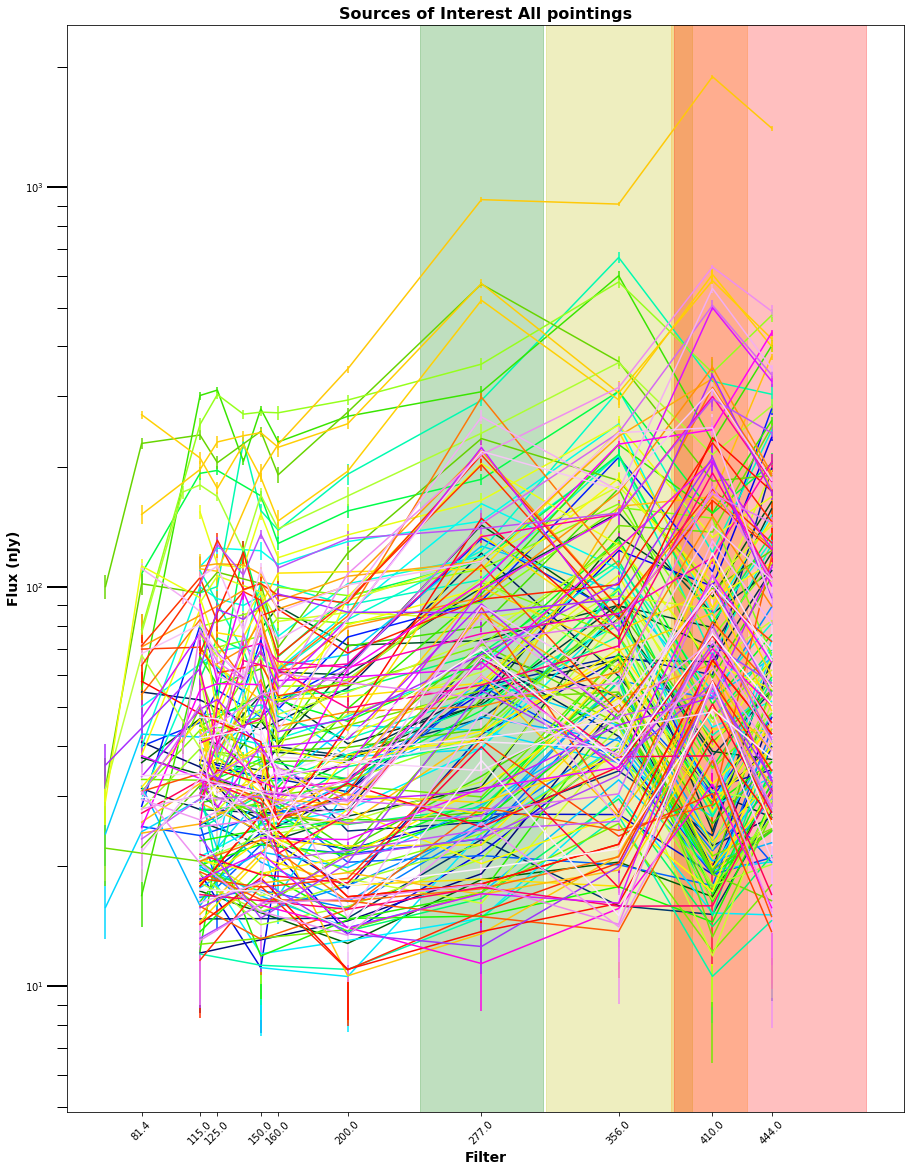

In [7]:
sed_flux = []
sed_err = []
sed_filters = []

plt.rcParams['figure.figsize'] = (15, 20)
#plot_sources(remaining['Object'], remaining, df_col6, 6)
df = eelgs
sources = eelgs['Object']
#plt.rcParams['figure.figsize'] = (20, 10)
#Grab filters from DataFrame
fs = []
fs_strings = []
a=df.index[0]
c=0
try:
    fs = []
    fs_strings = []
    for key in df.loc[a][4:17].keys():
        fs.append(float(key.split('F')[1]))
        fs_strings.append(key)
    start=4
    stop=17
    stop2 = 30
    f_final = []
    for f in fs:
        if f>600:
            f_final.append(f*.1)
        else:
            f_final.append(f)
except:
    fs = []
    fs_strings = []
    c+=1
    for key in df.loc[a][4:16].keys():
        fs.append(float(key.split('F')[1]))
        fs_strings.append(key)
    start = 4
    stop = 16
    stop2=28
    f_final = []
    for f in fs:
        if f>600:
            f_final.append(f*.1)
        else:
            f_final.append(f)
#Create a colormap 
colormap = plt.cm.gist_ncar
colors = [colormap(i) for i in np.linspace(0, 1,len(sources)+2)][1:-1]
#Create an SED for each of the sources
i=0
n=0
for obj in sources:
    #Increase the iteration tracker, grab the DataFrame for just this object
    n+=1
    #print(shapes[i])
    mk = np.array(df['Object']) == np.array(obj)
    a = df[mk]
    #Get the redshift and filters
    rs = a['PHOTOM_RED_SHIFT']
    filters = np.array(a.keys()[start:stop].values)
    filter_er = np.array(a.keys()[stop:stop2].values)
    #Mask the data so all filter values are greater than 3 times their error
    mask = (a[filters].values[0] > (3*a[filter_er].values[0]))& (a[filter_er].values[0]>0) 
    #Sort the data so the SED plot connects from left to right, regardless of filter input order
    z = sorted(zip(np.array(f_final)[mask],a[filters].values[0][mask]))
    x=[i[0] for i in z]
    y=[i[1] for i in z]
    plt.errorbar(x,y,a[filter_er].values[0][mask], label = f'Redshift = {rs.values[0]}, {obj}',
                color = colors[n-1])
    #Add the x ticks
    plt.xticks(np.array(f_final)[mask])

    sed_flux.append(a[filters].values[0][mask])
    sed_err.append(a[filter_er].values[0][mask])
    sed_filters.append(np.array(f_final)[mask])
    


#Add 277, 356, 410, and 444 filters
plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
#Add titles and labels
plt.title(f'Sources of Interest All pointings')
plt.ylabel('Flux (nJy)')
plt.yscale("log")
plt.xlabel('Filter')
plt.xticks(rotation = 45)
plt.tick_params('y', length=20, width=2, which='major')
plt.tick_params('y', length=10, width=1, which='minor')

We won't plot all the SEDs individually here. That would get a little intense. Instead here is the first SED from the dataset:

In [8]:
def plot_sed(num):
    flux = sed_flux[num]
    flux_er = sed_err[num]
    filters = sed_filters[num]

    plt.rcParams['figure.figsize'] = (10, 5)

    plt.errorbar(filters,flux, flux_er, label = f'Redshift = {rs.values[0]}, {obj}',
                color = 'k')
    #Add the x ticks
    plt.xticks(np.array(filters))

    #Add 277, 356, 410, and 444 filters
    plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
    plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
    plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
    plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
    #Add titles and labels
    plt.title(f'First Source: {sources.values[num]}')
    plt.ylabel('Flux (nJy)')
    #plt.yscale("log")
    plt.xlabel('Filter')
    plt.xticks(rotation = 45)
    plt.tick_params('y', length=20, width=2, which='major')
    plt.tick_params('y', length=10, width=1, which='minor')

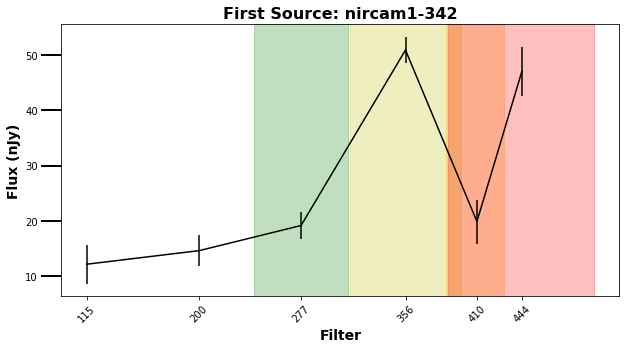

In [9]:
plot_sed(0)

<a class="anchor" id="temp"></a>

# Finding template SEDs

Firstly, we should explain how fitting SED templates works. We went searching for templates online and their description is below. These templates are designed to represent different types of sources at a redshift of z = 0. These templates are then intended to be redshifted by the user to create many template SEDs which we can then try to match to our data.

The primary reason we wanted to explore this project is because we hypothesized that the higher redshift sources detected by james webb are not well fitted to the templates designed for lower redshift sources. The EELGs that we detected are especially poorly represented by these templates, and we introcude a high equivalent width galaxy in the templates expecting that many of our EELGs will fit best to this template.

We are very very lucky. A paper was recently put on the arxiv covering SED templates at z>7. The templates are available publicly here:

https://ceers.github.io/LarsonSEDTemplates

first, we can download and display these templates.

In [10]:
#CHANGE TO YOUR PATH
template_paths = '/home/kelcey/computational_phys/Final/sed_templates/*.dat'
paths = glob.glob(template_paths)

### Plotting the SED Templates from high redshift paper

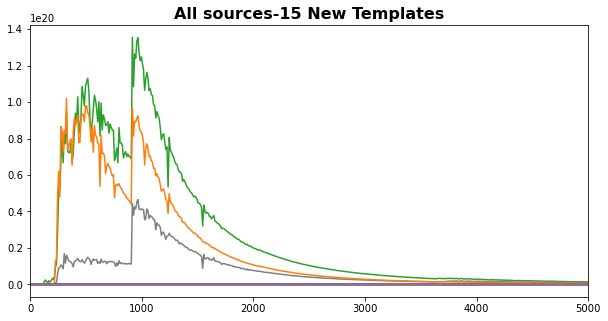

In [11]:
n = 0
for path in paths:
    n+=1
    #wavelength in AA
    wl = np.loadtxt(path)[:,0]
    #flux in f lambda
    dat = np.loadtxt(path)[:,1]
    plt.plot(wl, dat)
    title = path.split('/')[-1].split('.')[0]
    plt.xlim(0, 5000)
    plt.title(f'All sources-{n} New Templates')
    #plt.yscale('log')
    #plt.title(f'Source {title}')
    #plt.figure();

### Loading the SED templates from eazy:

We will also include the templates previously used by Astropy's eazy library. These are the templates that are typically used for SED fitting and the ones that would be used if we simply donwloaded eazy and ran it on the default templates. We expect these to be less likely to be a fit, but we will include them to see if they are the best fit for any of our sources. 

In [12]:
#CHANGE TO YOUR PATH
ez_path = '/home/kelcey/computational_phys/Final/ez_temps/*.dat'
ez_paths = glob.glob(ez_path)

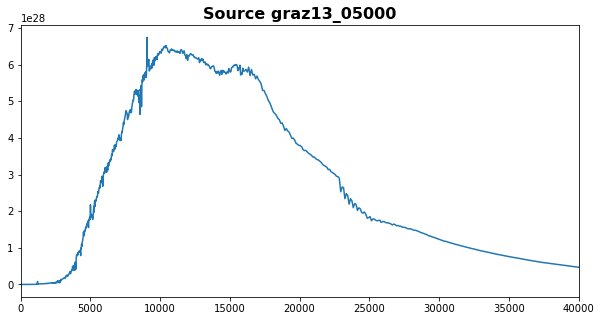

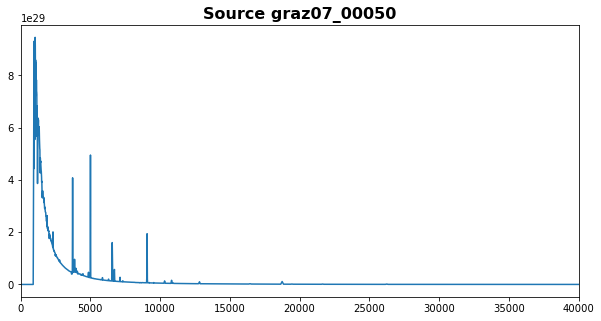

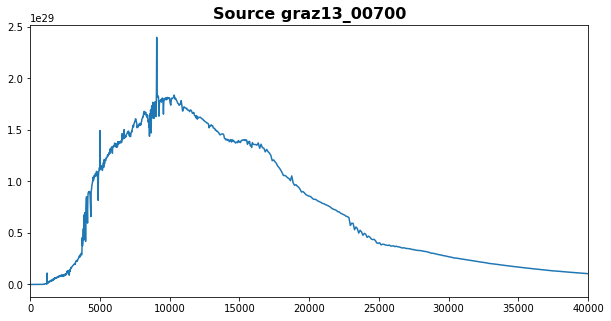

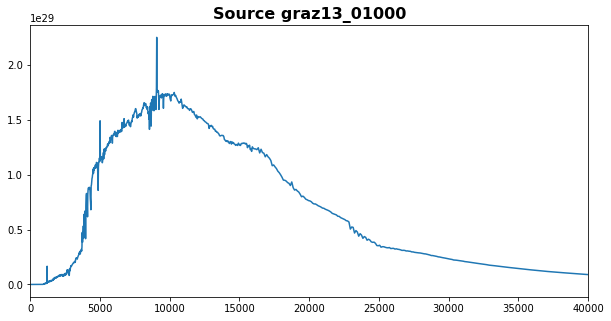

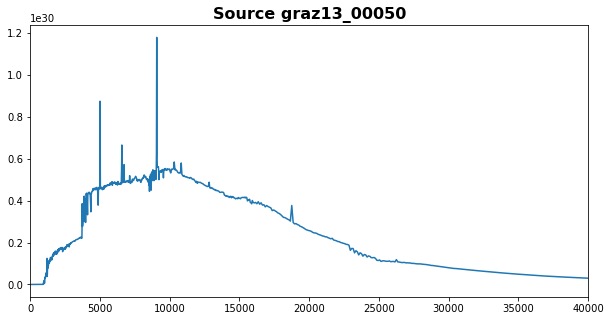

<Figure size 720x360 with 0 Axes>

In [13]:
#just getting the first few spectra since these do contain a lot of sources
for path in ez_paths[0:5]:
    #wavelength in AA
    wl = np.loadtxt(path)[:,0]
    #flux in f lambda
    dat = np.loadtxt(path)[:,1]
    plt.plot(wl, dat)
    title = path.split('/')[-1].split('.')[0]
    plt.xlim(0, 40000)
    plt.title(f'Source {title}')
    plt.figure();

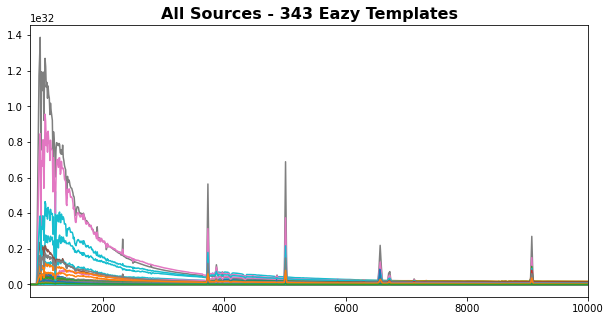

In [14]:
#just getting the first few spectra since these do contain a lot of sources
n = 0
for path in ez_paths:
    n+=1
    #wavelength in AA
    wl = np.loadtxt(path)[:,0]
    #flux in f lambda
    dat = np.loadtxt(path)[:,1]
    plt.plot(wl, dat)
    title = path.split('/')[-1].split('.')[0]
    plt.xlim(800, 10000)
    plt.title(f'All Sources - {n} Eazy Templates')
    #plt.figure();

<a class="anchor" id="grid"></a>

# The Redshift Grid

The SED templates are all designed to mimic the shape of different types of galaxies. Each of these are modeled at a redshift of z = 0. 

Our next step is to create a grid of SEDs that have been shifted to higher redshifts. We will look at a redshift range from z = 0 to z = 10.

What we then need is a grid. One axis will have our redshift values, from 0 to 10, increasing in increments of $\delta z$ = 0.1. The second axis will be each SED template, slightly redshifted for each new z value.

first, we read in our SEDs:

In [15]:
wl_new = []
dat_new = []
for path in paths:
    #wavelength in AA
    wl = np.loadtxt(path)[:,0]
    wl_new.append(wl)
    #flux in f lambda
    dat = np.loadtxt(path)[:,1]
    dat_new.append(dat)
    
wl_ez = []
dat_ez = []
for path in ez_paths:
    #wavelength in AA
    wl = np.loadtxt(path)[:,0]
    wl_ez.append(wl)
    #flux in f lambda
    dat = np.loadtxt(path)[:,1]
    dat_ez.append(dat)
    
wavelengths = []
wavelengths.extend(wl_ez)
wavelengths.extend(wl_new)

fluxes = []
fluxes.extend(dat_ez)
fluxes.extend(dat_new)

In [16]:
print(f'We have {len(dat_new)} new SED templates on top of our {len(dat_ez)} templates from eazy.')

We have 15 new SED templates on top of our 343 templates from eazy.


Defining our redshift matrix with the correct dimmensions:

In [17]:
#We will look at redshfits between 0 and 9 in incriments of 0.1
xspan = np.arange(0,10,0.1)
Nx = len(xspan)

yspan = np.arange(0, len(wavelengths))
Ny = len(yspan)

zgrid = np.zeros([Nx,Ny], dtype = object)
zgrid.shape

(100, 358)

Unit conversion: we need to convert from $F_{\lambda}$ to $F_{\nu}$ which we can then convery to nJy.

$F_{\lambda}$ units:

Fλ (in units of W m-2 nm-1) via http://www.vikdhillon.staff.shef.ac.uk/teaching/phy217/instruments/phy217_inst_mags.html

We want these vlaues in terms of $F_\nu$. We need to do this conversion first. 

$F_\lambda = \frac{c}{\lambda^2} F_\nu$

$F_\nu = \frac{\lambda^2}{c} F_\lambda$

Getting the value for the speed of light constant:

In [18]:
import astropy.constants as c
c.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

Getting the conversion from Angstroms to meters:

In [19]:
u.AA.to(u.m)

1.0000000000000002e-10

Doing this for one SED then generalizing:

In [20]:
#Fluxes in Flambda
flux = fluxes[0]
#Wavelength in AA
wave = wavelengths[0]
fv = []
for i in range(len(flux)):
    #c in m/s
    c_light = 2.9979246e8
    #flux in Flambda
    flamb = flux[i]
    #wavelength in m
    lamb = wave[i]*1e-10
    #add the flux in units of Fv
    fv.append((lamb**2/c_light)*flamb)

works! generalizing:

In [21]:
flux_fv = []

for m in range(len(fluxes)):

    #Fluxes in Flambda
    flux_l = fluxes[m]
    #Wavelength in AA
    wave = wavelengths[m]
    source_flux = []
    for i in range(len(flux_l)):
        #c in m/s
        c_light = 2.9979246e8
        #flux in Flambda
        flamb = flux_l[i]
        #wavelength in m
        lamb = wave[i]*1e-10
        source_flux.append((lamb**2/c_light)*flamb)
    flux_fv.append(source_flux)

making the first row in our matrix our SEDs at a redshidt of 0:

In [22]:
for yi, y in enumerate(yspan):
    zgrid[0,yi] = np.array([wavelengths[yi], flux_fv[yi]], dtype = object)

Next, we need to fill in the rest of the matrix. We want to shift the spectra to reflect a shift in redshift.

The math here is simple. We will shift the flux by multiplying the fluxes by (1+z) where z is the redshift.

Let's look at one of the spectra to illustrate this shift and then apply it to the rest of the models.

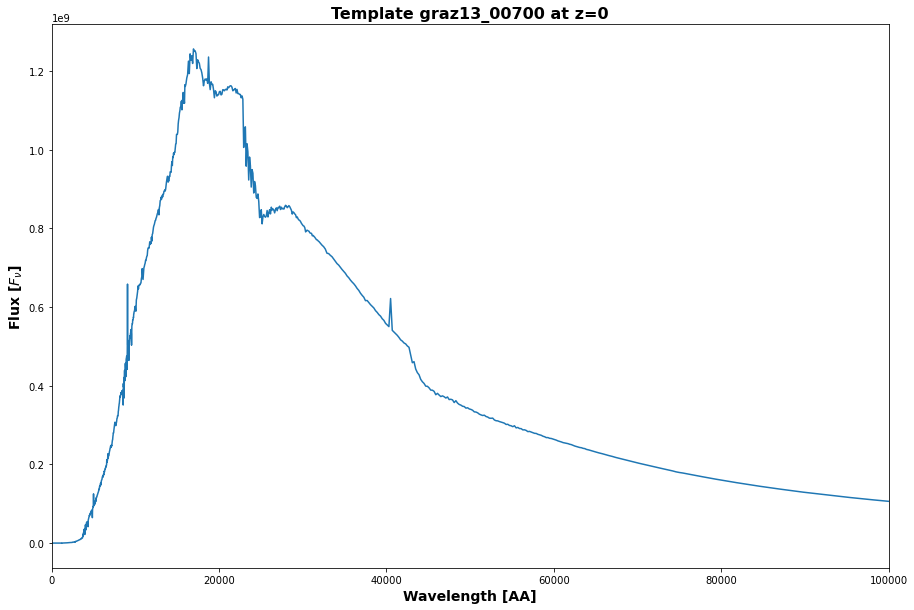

In [23]:
source = 2
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(wavelengths[source], flux_fv[source])
title = ez_paths[source].split('/')[-1].split('.')[0]
plt.xlim(0,1e5)
plt.title(f'Template {title} at z=0')
plt.xlabel('Wavelength [AA]')
plt.ylabel(r'Flux [$F_\nu $]');

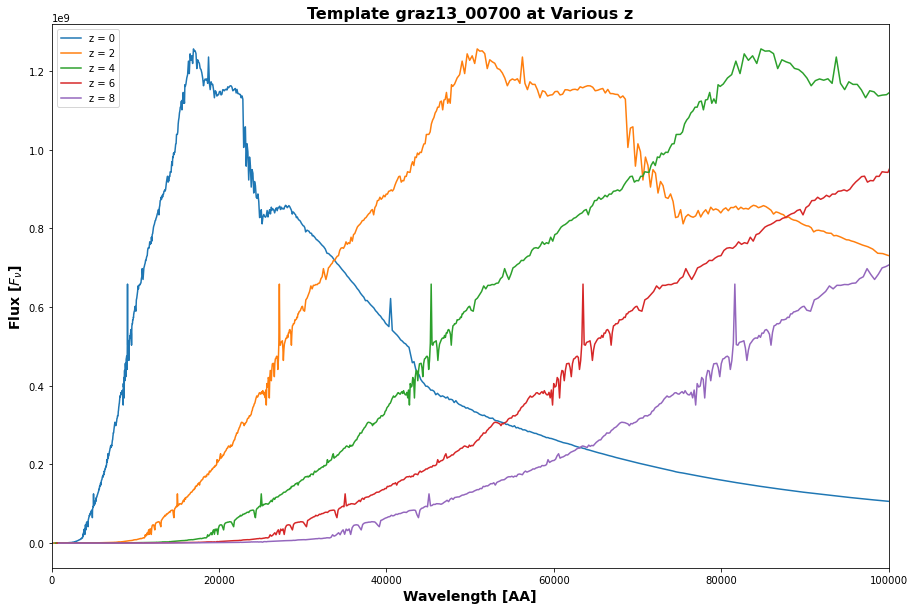

In [24]:
source = 2
plt.rcParams['figure.figsize'] = (15, 10)


for i in np.arange(0, 10, 2):
    shifted_w = (1+i)* wavelengths[source]
    plt.plot(shifted_w, flux_fv[source], label = f'z = {i}')
plt.legend()
title = ez_paths[source].split('/')[-1].split('.')[0]
plt.title(f'Template {title} at Various z');

plt.xlim(0,1e5)
plt.xlabel('Wavelength [AA]')
plt.ylabel(r'Flux [$F_\nu $]');

Now that that's working, I'll do this for all redshifts in our array for this source:

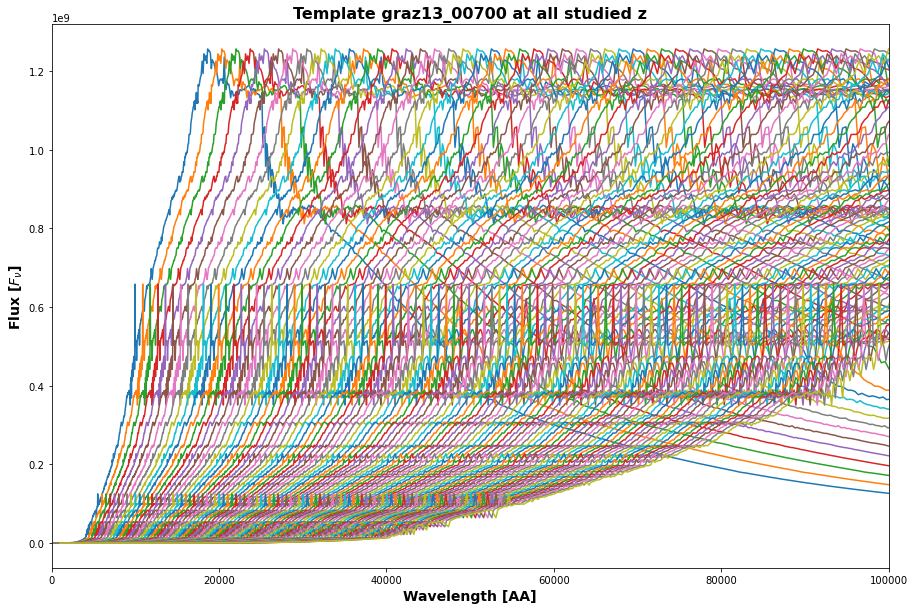

In [33]:
source = 2
plt.rcParams['figure.figsize'] = (15, 10)

#starting at the first non-zero redshift:
for i in xspan[1:]:
    shifted_w = (1+i)* wavelengths[source]
    
    plt.plot(shifted_w, flux_fv[source], label = f'z = {i}')
#plt.legend()
title = ez_paths[source].split('/')[-1].split('.')[0]
plt.title(f'Template {title} at all studied z');

plt.xlim(0,1e5)
plt.xlabel('Wavelength [AA]')
plt.ylabel(r'Flux [$F_\nu $]');

Expanding our matrix and filling it with these corrected values:

In [34]:
ind = 0
for x in xspan[1:]:
    ind+=1
    for source in yspan:
        zgrid[ind,source] = np.array([(1+x)*wavelengths[source], flux_fv[source]], dtype = object)

let's generate a random source from our grid so we can check that things are working correctly. Running this cell again will introdue another random source.

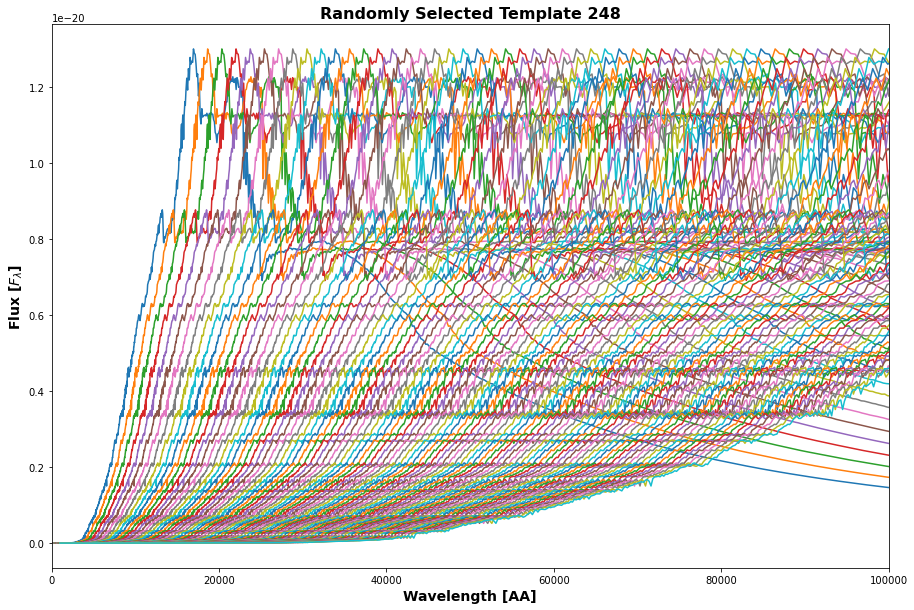

In [51]:
plt.rcParams['figure.figsize'] = (15, 10)
rand_ind = np.argmax(np.random.random(len(yspan)))
for i in range(len(zgrid[:,rand_ind])):
    plt.plot(zgrid[:,rand_ind][i][0], zgrid[:,rand_ind][i][1])
plt.xlim(0,1e5)
plt.title(f'Randomly Selected Template {rand_ind}')
plt.xlabel('Wavelength [AA]')
plt.ylabel('Flux [$F_{\lambda}$]');

It works!!!

<a class="anchor" id="chi"></a>

# The Chi Squared Fit

now that we have out redshfit grid working, we can get to fitting the SEDs. Our plan is to just run this for a few sources here and run it fully parallelized for the EELGs.

First: we need to make sure our units are nicely matched up. We will go back to our own JWST data:

for each source, we have flux:

In [ ]:
sed_flux 

Flux measurement error:

In [ ]:
sed_err

And filter values:

In [ ]:
sed_filters 

### Introducing an error floor:

a common issue in chi squared fits is eroneous errors. We want to decide how small an error can be allowed in our plots. A good starting floor that we can adjust later will be 10 nJy. To put this in perspective, a 10 nJy source corresponds to a magnitude of:

In [52]:
(10*1e-9*u.Jy).to(u.ABmag)

<Magnitude 28.9 mag(AB)>

which is VERY dim. From spending a lot of time staring at SED plots, this seems like a good error floor. We will look at all error values and if they are less than 10 nJy, we will increase the error to 10 nJy.

In [54]:
new_sed_err = []
for errlist in sed_err:
    new_vals = []
    for val in errlist:
        if val < 10:
            new_vals.append(10.0)
        else:
            new_vals.append(val)
    new_sed_err.append(new_vals)

let's just have a look at one of the SEDs with this error adjustment:

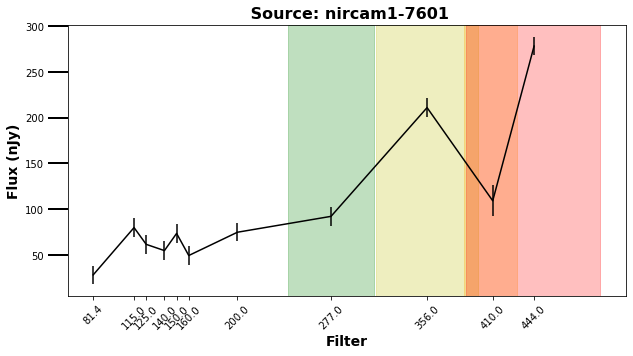

In [55]:
num = 20
flux = sed_flux[num]
flux_er = new_sed_err[num]
filters = sed_filters[num]

plt.rcParams['figure.figsize'] = (10, 5)

#Doing some re-aranging so the plot connects from left to right, not the order of the array
z = sorted(zip(np.array(filters),np.array(flux)))
x=[i[0] for i in z]
y=[i[1] for i in z]
plt.errorbar(x,y,flux_er,
            color = 'k')

plt.xticks(np.array(filters))

#Add 277, 356, 410, and 444 filters
plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
#Add titles and labels
plt.title(f' Source: {sources.values[num]}')
plt.ylabel('Flux (nJy)')
#plt.yscale("log")
plt.xlabel('Filter')
plt.xticks(rotation = 45)
plt.tick_params('y', length=20, width=2, which='major')
plt.tick_params('y', length=10, width=1, which='minor')

let's first design and run the fit on this source then adjust so that it works across sources. We also need to do some thinking about how to deal with filter widths. First, I will introduce another cut. This data is actually covering 2 telescopes, HST and JWST. Since we are mostly concerned with the JWST data and HST data is inconsistent for these sources, I will remove all the HST filters from the data.

Our JWST filters:

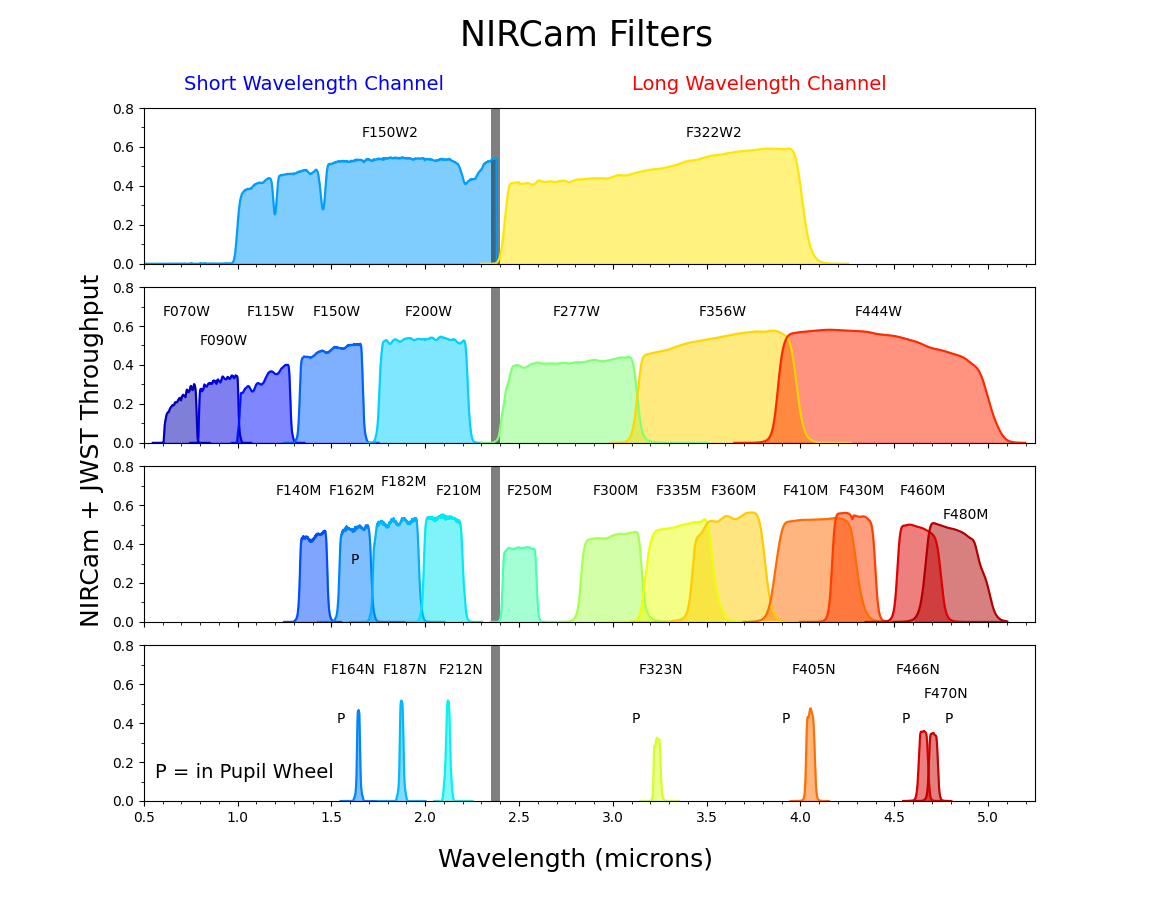

https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters

In [56]:
new_flux = []
new_filts = []
new_ferr = []

HST_filters = [81.4, 60.6, 105.0, 125.0, 160.0]
i = 0

#adjusting the flux arrays so that they do not include the HST data
for i in range(len(sed_flux)):
    fluxes = sed_flux[i]
    err = new_sed_err[i]
    fs = sed_filters[i]
    
    valflux = []
    valerr = []
    valfs = []
    
    point_ind = -1
    
    for f in fs:
        point_ind +=1
        if f not in HST_filters:
            valflux.append(fluxes[point_ind])
            valerr.append(err[point_ind])
            valfs.append(f)
    new_flux.append(valflux)
    new_filts.append(valfs)
    new_ferr.append(valerr)

Reconstructing our previous sample source but now with the fully modified plot:

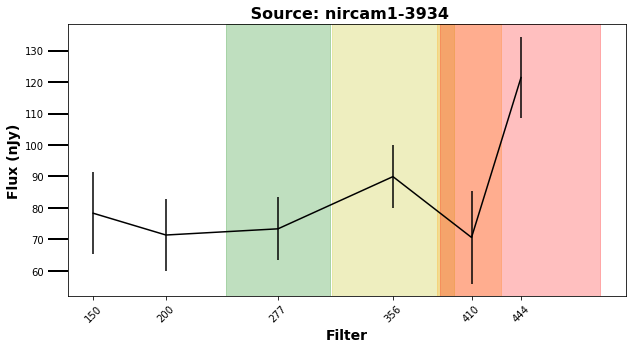

In [94]:
num = 10
flux = new_flux[num]
flux_er = new_ferr[num]
filters = new_filts[num]

plt.rcParams['figure.figsize'] = (10, 5)

#Doing some re-aranging so the plot connects from left to right, not the order of the array
z = sorted(zip(np.array(filters),np.array(flux)))
x=[i[0] for i in z]
y=[i[1] for i in z]
plt.errorbar(x,y,flux_er,
            color = 'k')

plt.xticks(np.array(filters))

#Add 277, 356, 410, and 444 filters
plt.axvspan(314, 398, label= 'F356', color = 'y', alpha = .25)
plt.axvspan(386.4, 430.1, label= 'F410', alpha = 0.25, color = 'orange')
plt.axvspan(388, 498.6, label= 'F444', color = 'r', alpha = .25)
plt.axvspan(241.6, 312.7, label= 'F277', color = 'g', alpha = .25)
#Add titles and labels
plt.title(f' Source: {sources.values[num]}')
plt.ylabel('Flux (nJy)')
#plt.yscale("log")
plt.xlabel('Filter')
plt.xticks(rotation = 45)
plt.tick_params('y', length=20, width=2, which='major')
plt.tick_params('y', length=10, width=1, which='minor')

Looks great!

Next: we need to figure out how we want to feed our data in to the chai squared fit. We have the complicated case that our filters are overalping. First, we need to define all our filter widths.

Getting all the filter names:


In [58]:
used_filters = []
for n in new_filts:
    used_filters.extend(n)
used = sorted(set(used_filters))
used

[115.0, 140.0, 150.0, 200.0, 277.0, 356.0, 410.0, 444.0]

we need to create a dictionary that holds the filters and their widths. We also need to convert these values to Amgstroms. They are currently in $\mu$m.

In [59]:
conversion = (1*1e-6*u.m).to(u.AA)
print(f'1 um is {conversion}s.')

1 um is 9999.999999999998 Angstroms.


In [314]:
#conversion factor for filter values
conv = 1e4
#conversion factor when getting filter values directly from name
conv_keyname = 1e-2*1e4

In [141]:
#conv = conversion.value

#first entry is filter center in AA
#second entry is leftmost end of filter in AA (bluest end)
#third entry is rightmost end of filter in AA (reddest end)
filter_dict = {115.0:[1.154*conv, 1.013*conv, 1.282*conv],
               
               140.0:[1.404*conv, 1.331*conv, 1.479*conv],
               
               150.0:[1.501*conv, 1.331*conv, 1.668*conv],
               
               200.0:[1.990*conv, 1.775*conv, 2.227*conv],
               
               277.0:[2.786*conv, 2.423*conv, 3.132*conv],
               
               356.0:[3.563*conv, 3.135*conv, 3.981*conv],
               
               410.0:[4.092*conv, 3.866*conv, 4.302*conv],
               
               444.0:[4.421*conv, 3.881*conv, 4.982*conv]
}

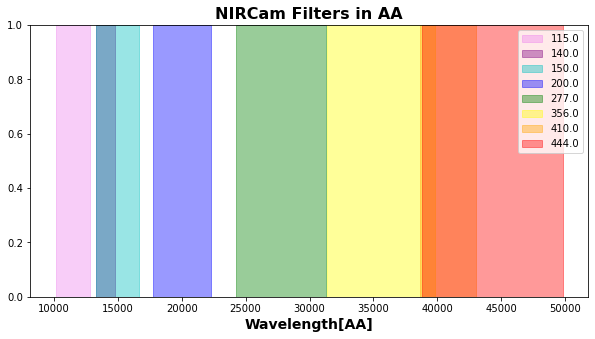

In [142]:
#plotting the NIRCam filters in AA
plt.rcParams['figure.figsize'] = (10, 5)
cols = [ 'violet','purple','c','blue','green', 'yellow', 'orange', 'r']
c=-1
for key in filter_dict.keys():
    c+=1
    plt.axvspan(filter_dict[key][1], filter_dict[key][2], color=cols[c],alpha = 0.4, label = f'{key}')
    plt.title('NIRCam Filters in AA')
    plt.xlabel('Wavelength[AA]')
    plt.legend();

**converting the units of our data**:

We have our template in $F_{\nu}$. We want to convert these to nJy.

In [145]:
conv_fv_to_njy = 1e-35
conv_njy_to_fv = 1e35

 Our SED flux tempaltes are UNITLESS. We need to fit to the general shape, not the magnitude of the fluxes. For this, we will update our SED fitting code to normalize the SED template and the real SED to 1 so we fit for shape only, not amplitude.

In [315]:
#We use this cell to change our flux arrays by some multiplicative factor. This was useful when we were 
#playing with normalizing the curve but less useful now. Will re-write code to remove in the future (probably)
flux_corr = []
err_corr = []
#new_filts
for i in range(len(new_flux)):
    flux = np.array(new_flux[i])#*1e-3#*conv_fv_to_njy*1e1#/1e3#*conv_njy_to_fv
    err = np.array(new_ferr[i])#*1e-3#*conv_fv_to_njy*1e1#/1e3#*conv_njy_to_fv
    
    flux_corr.append(flux)
    err_corr.append(err)

Testing getting a sample SED for one source before we generalize:

In [148]:
w = zgrid[20,20][0]
f = zgrid[20,20][1]
#plt.plot(w, f);
source_dict = {}
for key in filter_dict.keys():
    lower = filter_dict[key][1]
    upper = filter_dict[key][2]
    mask = (w>lower) & (w<upper)
    source_dict[key] = np.sum(f[mask])
source_dict

{115.0: 17894223506.488457,
 140.0: 18944885619.204704,
 150.0: 44752413253.1552,
 200.0: 73488862137.49341,
 277.0: 128635779741.7587,
 356.0: 73512991064.30162,
 410.0: 38036124874.52154,
 444.0: 90199666525.96935}

This should give the total flux observed in each filter. We need to update our zgrid to create a grid of these values for all the entries in zgrid.

In [149]:
xspan = np.arange(0,10,0.1)
Nx = len(xspan)


yspan = np.arange(0, len(wavelengths))
Ny = len(yspan)

sed_grid = np.zeros([Nx,Ny], dtype = object)

for xi, x in enumerate(xspan):
    for yi, y in enumerate(yspan):
        w = zgrid[xi,yi][0]
        f = zgrid[xi,yi][1]
        source_dict = {}
        for key in filter_dict.keys():
            lower = filter_dict[key][1]
            upper = filter_dict[key][2]
            #cover cases where there is no flux, or nothing falls within masked area
            try:
                mask = (w>lower) & (w<upper)
                source_dict[key] = np.sum(f[mask])
            except:
                source_dict[key] = 0
        sed_grid[xi, yi] = source_dict

Again, starting with just fitting one source, we will use the source from the SED we plotted.

We want to fit an sed:

to a curve in:

sed_grid

so that we can find it's corresponding redshift and best fit line in:

zgrid

Plotting one of the SEDs from the sed_grid matrix to show evweything checks out:

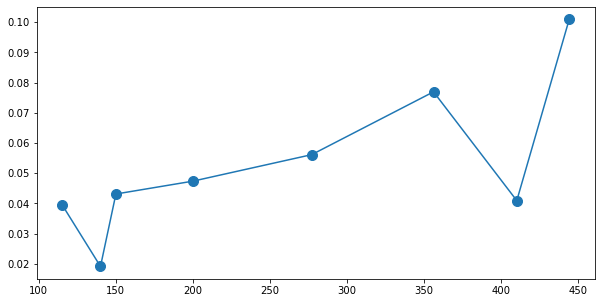

In [150]:
xval = 80
yval = 350

sed = []
for key in sed_grid[xval,yval].keys():
    sed.append(sed_grid[xval,yval][key])

plt.plot(sed_grid[xval,yval].keys(), sed, marker = '.', markersize = 20);

## Calculating chi squared

* the chi squared value is:

$\chi_{z, i}^2 = \sum_{j=1} ^{N_{filt}} \frac{(T_{z i j} - F_j)^2}{\delta F_j^2}$

$N_{filt}$ = number of filters

T: Synthetic flux of template i in filter j for redshift z

$F_j$: observed flux in filter

$\delta F_j$: observed error



via: https://arxiv.org/pdf/0807.1533.pdf

the generalized case for a single object:

In [293]:
num = 110
filters = new_filts[num]
errors = err_corr[num]
flux = flux_corr[num]

In [294]:
Nfilt = len(filters)
chisqr = 0
for i in range(Nfilt):
    filt = filters[i]
    modelT = sed_grid[0,0][filt]
    F = flux[i]
    filterr = errors[i]
    chisqr+=(((modelT-F)**2)/((filterr)**2))

In [295]:
chis = np.zeros([Nx,Ny], dtype = float)

for xi, x in enumerate(xspan):
    for yi, y in enumerate(yspan):
        Nfilt = len(filters)
        chisqr = 0
        for i in range(Nfilt):
            filt = filters[i]
            modelT = sed_grid[xi,yi][filt]
            F = flux[i]
            filterr = errors[i]
            chisqr+=(((modelT-F)**2)/((filterr)**2))
        chis[xi,yi] = chisqr

turning this in to a function:

In [308]:
def get_fit(num):
    """
    Generates a chi squared fit for a source in the EELGs candidate list indicated by its index
    
    Params
    ---
    num: integer index of relavent source
    
    Returns
    ---
    print statements: prints out information about the chi squared fit
    
    figure 1: chi squared figure, indicates chi squared values across the grid of possible fits by
    redshift (y axis) and index of fit in the array of templates (xaxis)
    
    figure 2: SED with highest chi squared value from grid, colors indicate NIRCam filters
    
    figure 3: Real SED being fit, colors indicate NIRCam filters
    """

    filters = new_filts[num]
    errors = err_corr[num]
    flux = flux_corr[num]

    xspan = np.arange(0,10,0.1)
    Nx = len(xspan)


    yspan = np.arange(0, len(wavelengths))
    Ny = len(yspan)

    chis = np.zeros([Nx,Ny], dtype = float)

    fmin = np.min(flux)
    fmax = np.max(flux)

    norm_flux = (flux - fmin)/(fmax - fmin)
    scaled_err = (errors - fmin)/(fmax - fmin)

    for xi, x in enumerate(xspan):
        for yi, y in enumerate(yspan):
            Nfilt = len(filters)
            chisqr = 0
            sed_vals = []
            for key in sed_grid[xi, yi].keys():
                sed_vals.append(sed_grid[xi, yi][key])

            sed_min = np.min(sed_vals)
            sed_max = np.max(sed_vals)


            for i in range(Nfilt):
                filt = filters[i]
                modelT = (sed_grid[xi,yi][filt]-sed_min)/(sed_max - sed_min)
                F = norm_flux[i]
                filterr = scaled_err[i]
                chisqr+=(((modelT-F)**2)/((filterr)**2))
            chis[xi,yi] = chisqr

            
    print('Minimum chi sqr: ', np.min(chis))  
    
    plt.rcParams['figure.figsize'] = (10, 5)
    plt.imshow(chis, cmap = 'viridis', extent = [0,len(yspan), 0, 10], aspect = 'auto')
    plt.xlabel('Templates')
    plt.ylabel('Redshift')
    plt.title('$\chi^2$');
    plt.figure();
    
    #un-comment to display log(x^2) in case that values are extreme
   # plt.rcParams['figure.figsize'] = (10, 5)
   # plt.imshow(np.log(chis), cmap = 'viridis', extent = [0,len(yspan), 0, 10], aspect = 'auto')
   # plt.xlabel('Templates')
   # plt.ylabel('Redshift')
   # plt.title('Log($\chi^2$)');



    plt.rcParams['figure.figsize'] = (10, 5)

    b = np.min(chis)
    x = np.where(chis == b)[0][0]
    y = np.where(chis == b)[1][0]

    print('Redshift = ', xspan[x])

    print('Grid location: x =', x,' y =', y)

    sed = []
    for key in sed_grid[x,y].keys():
        sed.append(sed_grid[x,y][key])


    sed_max = np.max(sed)
    sed_min = np.min(sed)

    simvals = (sed - sed_min)/(sed_max - sed_min)

    plt.plot(np.array(list(sed_grid[x,y].keys()))*conv_keyname, 
             simvals, marker = '.', markersize = 20, c = 'k')

    cols = ['violet','purple','c','blue','green', 'yellow', 'orange', 'r']
    c=-1
    for key in filter_dict.keys():
        c+=1
        plt.axvspan(filter_dict[key][1], filter_dict[key][2], color=cols[c],alpha = 0.2, label = f'{key}')

    plt.title('Simulated SED')
    plt.xlabel('Wavelength [AA]')
    plt.ylabel(r'Flux [$F_\nu $]');
    plt.figure()

    plt.plot(np.array(filters)*conv_keyname, norm_flux, marker = '.', markersize = 20, c = 'k')
    c = -1
    for key in filter_dict.keys():
        c+=1
        plt.axvspan(filter_dict[key][1], filter_dict[key][2], color=cols[c],alpha = 0.2, label = f'{key}')

    plt.title('Real SED')
    plt.xlabel('Wavelength [AA]')
    plt.ylabel(r'Flux [$nJy$]');
    print('')
    cvals = []
    for xi, x in enumerate(xspan):
        for yi, y in enumerate(yspan):
            cvals.append(chis[xi,yi])
            
    print('The 10 most likely redshifts are: ')
    first_10 = sorted(cvals)[0:10]
    for chival in first_10:
        x = np.where(chis == chival)[0][0]
        print(x*.1, ' ',end = '')
        
    print('')
    print('\nWith Chi^2 values of:')
    for i in first_10:
        print(round(i, 5),' ', end= '')
    print('') 
    
    print('\nFor templates numbered:')
    for chival in first_10:
        y = np.where(chis == chival)[1][0]
        print(y, ' ',end = '')
    print('') 

    return chis

Running this for one source to see the graphs are generating correctly:

Minimum chi sqr:  0.3947672716025542
Redshift =  3.6
Grid location: x = 36  y = 339

The 10 most likely redshifts are: 
3.6  3.5  3.5  3.6  3.6  3.5  3.5  3.5  3.5  3.5  

With Chi^2 values of:
0.39477  0.41811  0.4238  0.42586  0.42586  0.4281  0.43639  0.44778  0.44778  0.45811  

For templates numbered:
339  121  254  220  220  323  290  247  247  251  


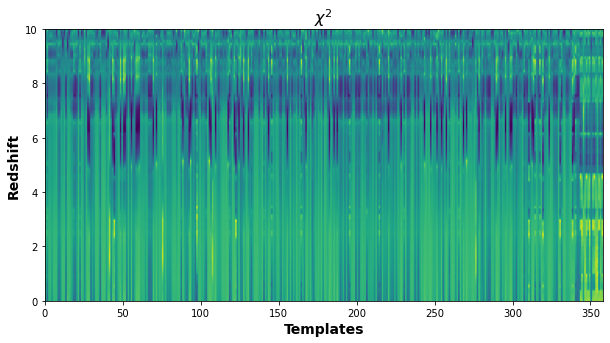

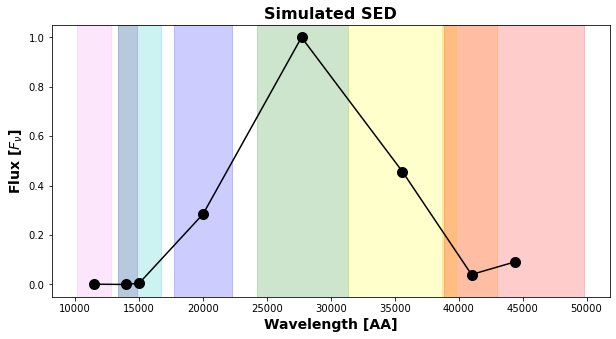

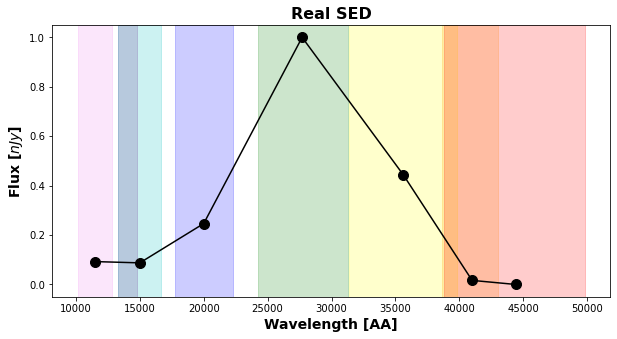

In [309]:
chi = get_fit(8)

In [317]:
eelgs

RA        DEC  Region  Stellarity       F115       F150  \
4    214.955712  52.983426       2       0.959  12.111284   6.617296   
11   214.940369  52.970817       2       0.143  35.397019  24.001542   
24   214.930437  52.960170       2       0.624  52.093099  43.950960   
28   214.951152  52.973409       2       0.778  27.697692  27.168353   
40   214.951936  52.971742       2       0.659  10.303382  38.746461   
..          ...        ...     ...         ...        ...        ...   
525  214.846157  52.809369       2       0.922  47.173621  42.404916   
529  214.847196  52.808349       2       0.969  41.865877  44.323613   
537  214.900216  52.844548       1       0.889  17.418578  17.311144   
544  214.860355  52.813352       2       0.855  20.764329  24.658043   
553  214.858181  52.809214       2       0.116  28.526852  30.600086   

          F200        F277       F356        F410  ...  SPECTRAL_RED_SHIFT  \
4    14.575215   19.126765  50.955854   19.845123  ...              7.2401   
11   30.455694   68.656104  53.023521   29.067086  ...              6.4801   
24   55.730953  121.401970  59.780602   30.684665  ...              4.3500   
28   27.720895   66.323156  42.228875   22.483288  ...              4.5500   
40   37.489974   54.789717  65.729269   64.936031  ...              9.1601   
..         ...         ...        ...         ...  ...                 ...   
525  38.862905   41.866656  46.295612  101.248204  ...              7.1201   
529  36.159395   40.938175  39.514535  121.506241  ...              7.0801   
537  13.874501   36.747642  15.034757   57.897959  ...              4.7300   
544  17.867454   19.673407  22.070584   49.415672  ...              7.3301   
553  42.454110   69.896043  36.165826   76.074306  ...              4.4700   

     STELLAR_MASS  STELLAR_MASS_ERR  PHOTOM_RED_SHIFT        Object  \
4           8.977             0.209            7.2401   nircam1-342   
11          8.347             0.143            6.4801   nircam1-641   
24          8.268             0.310            4.3500  nircam1-1233   
28          8.884             0.262            4.5500  nircam1-1478   
40          9.267             0.858            9.1601  nircam1-1850   
..            ...               ...               ...           ...   
525         8.328             0.074            7.1201  nircam6-7356   
529         8.663             0.128            7.0801  nircam6-7644   
537         8.015             0.204            4.7300  nircam6-7927   
544         8.135             0.979            7.3301  nircam6-8393   
553         8.664             0.159            4.4700  nircam6-8829   

             X          Y        SFR    Area      SHAPE  
4    6065.7910  4376.1494   3.136160     Top      p3p44  
11   7936.6235  4239.7817   4.404910     Top       w277  
24   9374.9424  3958.6521   4.183520     Top       w277  
28   7194.8125  3847.8994   1.600630     Top       w277  
40   7310.4062  3675.0889  12.458800     Top        p44  
..         ...        ...        ...     ...        ...  
525  7790.2964  1118.0483   5.525850  Bottom       w410  
529  7834.8018   981.3619   2.706410  Bottom       w410  
537  2035.3304   862.9374   0.608112  Bottom  p410sp277  
544  6759.5356   642.1173   2.794460  Bottom       w410  
553  7240.0898   441.0411   1.586390  Bottom   p277p410  

[182 rows x 40 columns]

Minimum chi sqr:  1.9313694242015882
Redshift =  5.1000000000000005
Grid location: x = 51  y = 338

The 10 most likely redshifts are: 
5.1000000000000005  5.2  5.300000000000001  5.2  5.1000000000000005  5.1000000000000005  5.2  5.1000000000000005  5.2  5.1000000000000005  

With Chi^2 values of:
1.93137  1.94407  2.08894  2.26993  2.27607  2.30172  2.31543  2.49352  2.50785  2.90347  

For templates numbered:
338  338  319  330  330  319  319  122  122  310  


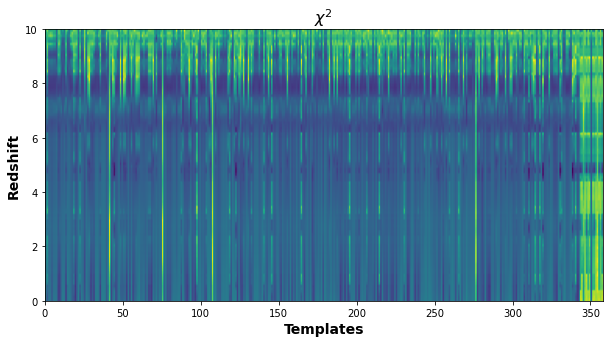

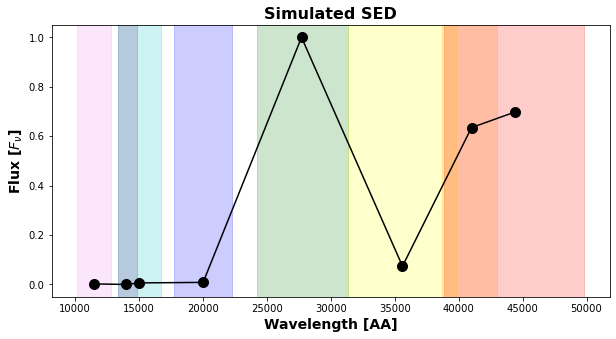

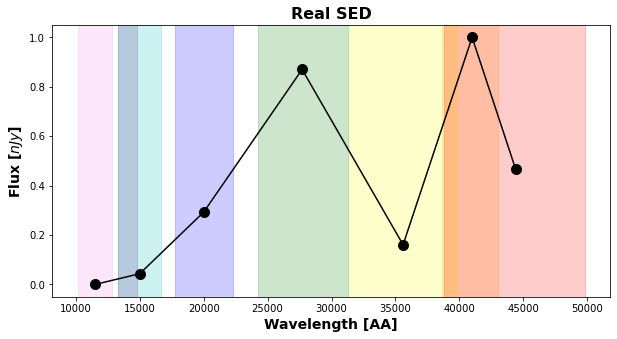

In [324]:
chi = get_fit(181)

# Generating several sources:

* Rachel: Here is where you can explore your sources.

* to get the index of a source from it's source identifier, replace the string with the correct identifier in the cell below:

* run this on sources you think have the highest redshift.

* look for sources where the chi squared estimation is bad (high values, top 10 redshifts disagree...)


Minimum chi sqr:  0.726471008019848
Redshift =  3.5
Grid location: x = 35  y = 88

The 10 most likely redshifts are: 
3.5  3.5  3.5  4.6000000000000005  3.5  4.7  4.5  4.800000000000001  4.5  3.6  

With Chi^2 values of:
0.72647  0.72647  0.7271  0.73462  0.75434  0.75854  0.77276  0.78005  0.83723  0.84191  

For templates numbered:
88  88  105  122  270  122  44  122  122  71  


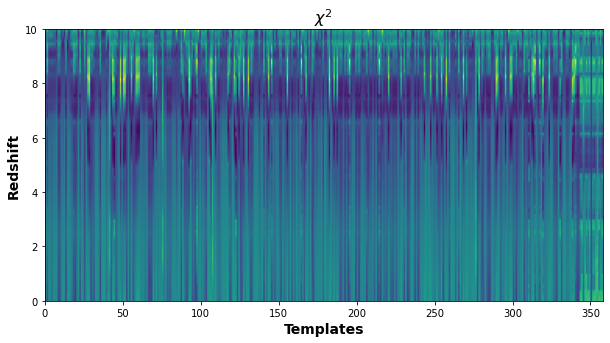

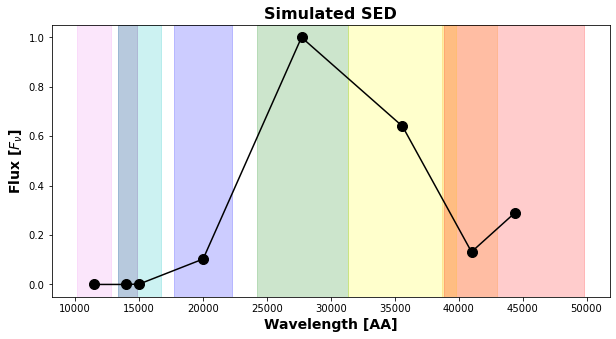

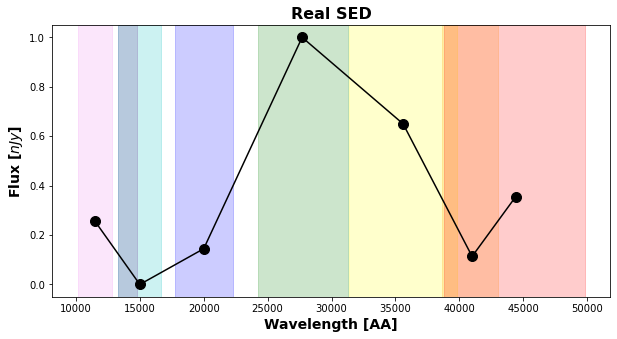

In [312]:
object_string = 'nircam1-342'


mask = (eelgs['Object'] == object_string)
ind = 0
for i in mask:
    ind+=1
    if i == True:
        rachel = ind
#        print(ind)
chi = get_fit(rachel)